In [10]:
import pandas as pd

In [ ]:
# read csv file directly from a url and save the result
# data sources available at https://www.kaggle.com/purbar/advertising-data
# downloaded the data in my directory 

In [22]:
# save the data
data=pd.read_csv('Advertising.csv',index_col=0)
# display first five rows
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
# display last 5 rows
data.tail()


,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [24]:
# check the shape of the dataframe
data.shape


(200, 4)

In [26]:
# import seaborn library 
import seaborn as sns
#allow plot to appear within the notebook
%matplotlib inline

C:\Users\Tamal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


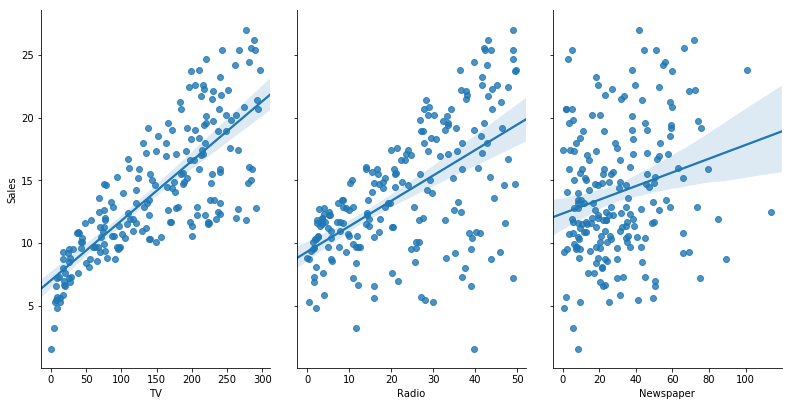

In [32]:
# visualize the relationship between the features and response using scatterplots

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=5.75,aspect=0.65,kind='reg')


In [66]:
# creating feature columns 
feature_cols=['TV','Radio','Newspaper'] 

# use the list to select a subset of original dataframe
X=data[fearture_cols]

# equivalant cmmand to do the same in one line

X=data[['TV','Radio','Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [45]:
# check the head of X data frame
X.head()


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [48]:
# select a series from dataframe
y=data.Sales

y.head(3)

1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64

In [ ]:
"""Spliting data set into train and test sets """

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
# default split is train_size=75%, test_size=25% 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 3)
(50, 3)
(150,)
(50,)


In [ ]:
Linear regression in scikit learn

In [54]:
# import model

from sklearn.linear_model import LinearRegression
#instantiate
linreg=LinearRegression()


# fit the model to the training data(Learn the co-efficients)
linreg.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Interpreting model coefficients 

In [55]:
# print the intercept & coefficients 

print(linreg.intercept_)
print(linreg.coef_)



2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [58]:
# pair the feature names with feature coefficients 

list(zip(feature_cols,linreg.coef_))



[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

MAKE PREDICTION

In [59]:
y_pred= linreg.predict(X_test)

In [61]:
# calculate Mean absolute error(MAE) using sci-kit learn

from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))


1.0668917082595208


In [62]:
# calculate Mean squared error(MSE) using sklearn

print(metrics.mean_squared_error(y_test,y_pred))


1.9730456202283375


In [64]:
# Calculate RMSE (Root mean squared error) using sklearn

import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



1.4046514230328953


In [76]:
# recreate a python list of feature names, trying to improve model by removing 'Newspaper column'

# reshaping X
X=data[['TV','Radio']] 
# reshaping y
y=data.Sales

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(150, 2)
(150,)
(50, 2)
(50,)


In [80]:
# fit the model with the training data
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_test,y_test)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
y_pred=linreg.predict(X_test)

In [83]:
#calculate RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.2765674115787067
